In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# 1 – Data Loading & Visualization

In [209]:
df = pd.read_csv('hand_landmarks_data.csv')
df.head()

,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,...,x19,y19,z19,x20,y20,z20,x21,y21,z21,label
0,262.669968,257.304901,-3.649205e-07,257.417542,247.109055,0.004224,246.882957,241.716827,0.005798,236.384537,...,223.345093,255.490692,-0.020450,215.043365,258.114746,-0.024577,208.006393,259.608673,-0.026722,call
1,83.351778,346.059113,-2.345265e-07,81.925037,328.562347,-0.011102,90.080132,311.535248,-0.021096,95.641823,...,132.451618,341.794434,-0.038175,142.773582,342.829254,-0.037336,152.431698,343.015991,-0.036136,call
2,187.756977,260.235492,-2.417307e-07,195.460579,241.506035,-0.000184,207.259529,223.674339,-0.009687,215.413628,...,250.301010,268.602938,-0.044068,262.425133,271.276638,-0.040469,272.989952,272.272231,-0.038301,call
3,114.976696,331.594238,-1.233261e-07,114.503494,320.549957,-0.002824,116.636627,310.080994,-0.008911,117.685066,...,145.195450,329.357544,-0.027622,151.053200,329.712341,-0.027863,155.990364,329.548828,-0.027723,call
4,188.795288,141.727867,-1.622995e-07,188.520905,127.947464,-0.002884,191.982880,111.010563,-0.008115,192.552521,...,226.696396,132.263248,-0.025113,234.831741,130.684147,-0.024087,241.587769,128.477188,-0.023486,call


In [9]:
df.shape

(25675, 64)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25675 entries, 0 to 25674
Data columns (total 64 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      25675 non-null  float64
 1   y1      25675 non-null  float64
 2   z1      25675 non-null  float64
 3   x2      25675 non-null  float64
 4   y2      25675 non-null  float64
 5   z2      25675 non-null  float64
 6   x3      25675 non-null  float64
 7   y3      25675 non-null  float64
 8   z3      25675 non-null  float64
 9   x4      25675 non-null  float64
 10  y4      25675 non-null  float64
 11  z4      25675 non-null  float64
 12  x5      25675 non-null  float64
 13  y5      25675 non-null  float64
 14  z5      25675 non-null  float64
 15  x6      25675 non-null  float64
 16  y6      25675 non-null  float64
 17  z6      25675 non-null  float64
 18  x7      25675 non-null  float64
 19  y7      25675 non-null  float64
 20  z7      25675 non-null  float64
 21  x8      25675 non-null  float64
 22

In [17]:
df['label'].value_counts()

label
three2             1653
palm               1649
four               1634
ok                 1592
stop_inverted      1567
call               1506
peace_inverted     1497
stop               1482
rock               1458
three              1456
peace              1441
like               1436
two_up_inverted    1371
two_up             1343
dislike            1295
one                1263
mute               1087
fist                945
Name: count, dtype: int64

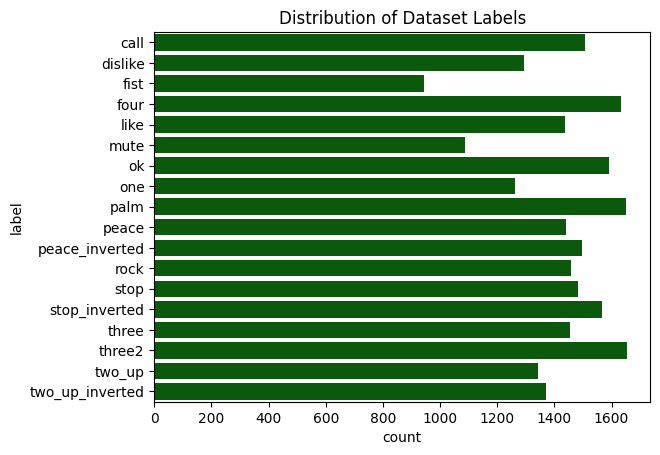

In [38]:
sns.countplot(df['label'],color='darkgreen')
plt.title('Distribution of Dataset Labels')
plt.show()

In [59]:
connections = [
    (0, 1), (1, 2), (2, 3), (3, 4),          # Thumb
    (0, 5), (5, 6), (6, 7), (7, 8),          # Index finger
    (5, 9), (9, 10), (10, 11), (11, 12),     # Middle finger
    (9, 13), (13, 14), (14, 15), (15, 16),   # Ring finger
    (13, 17), (0, 17), (17, 18), (18, 19), (19, 20) # Pinky base & finger
]

In [81]:
df['label'].unique()

array(['call', 'dislike', 'fist', 'four', 'like', 'mute', 'ok', 'one',
       'palm', 'peace', 'peace_inverted', 'rock', 'stop', 'stop_inverted',
       'three', 'three2', 'two_up', 'two_up_inverted'], dtype=object)

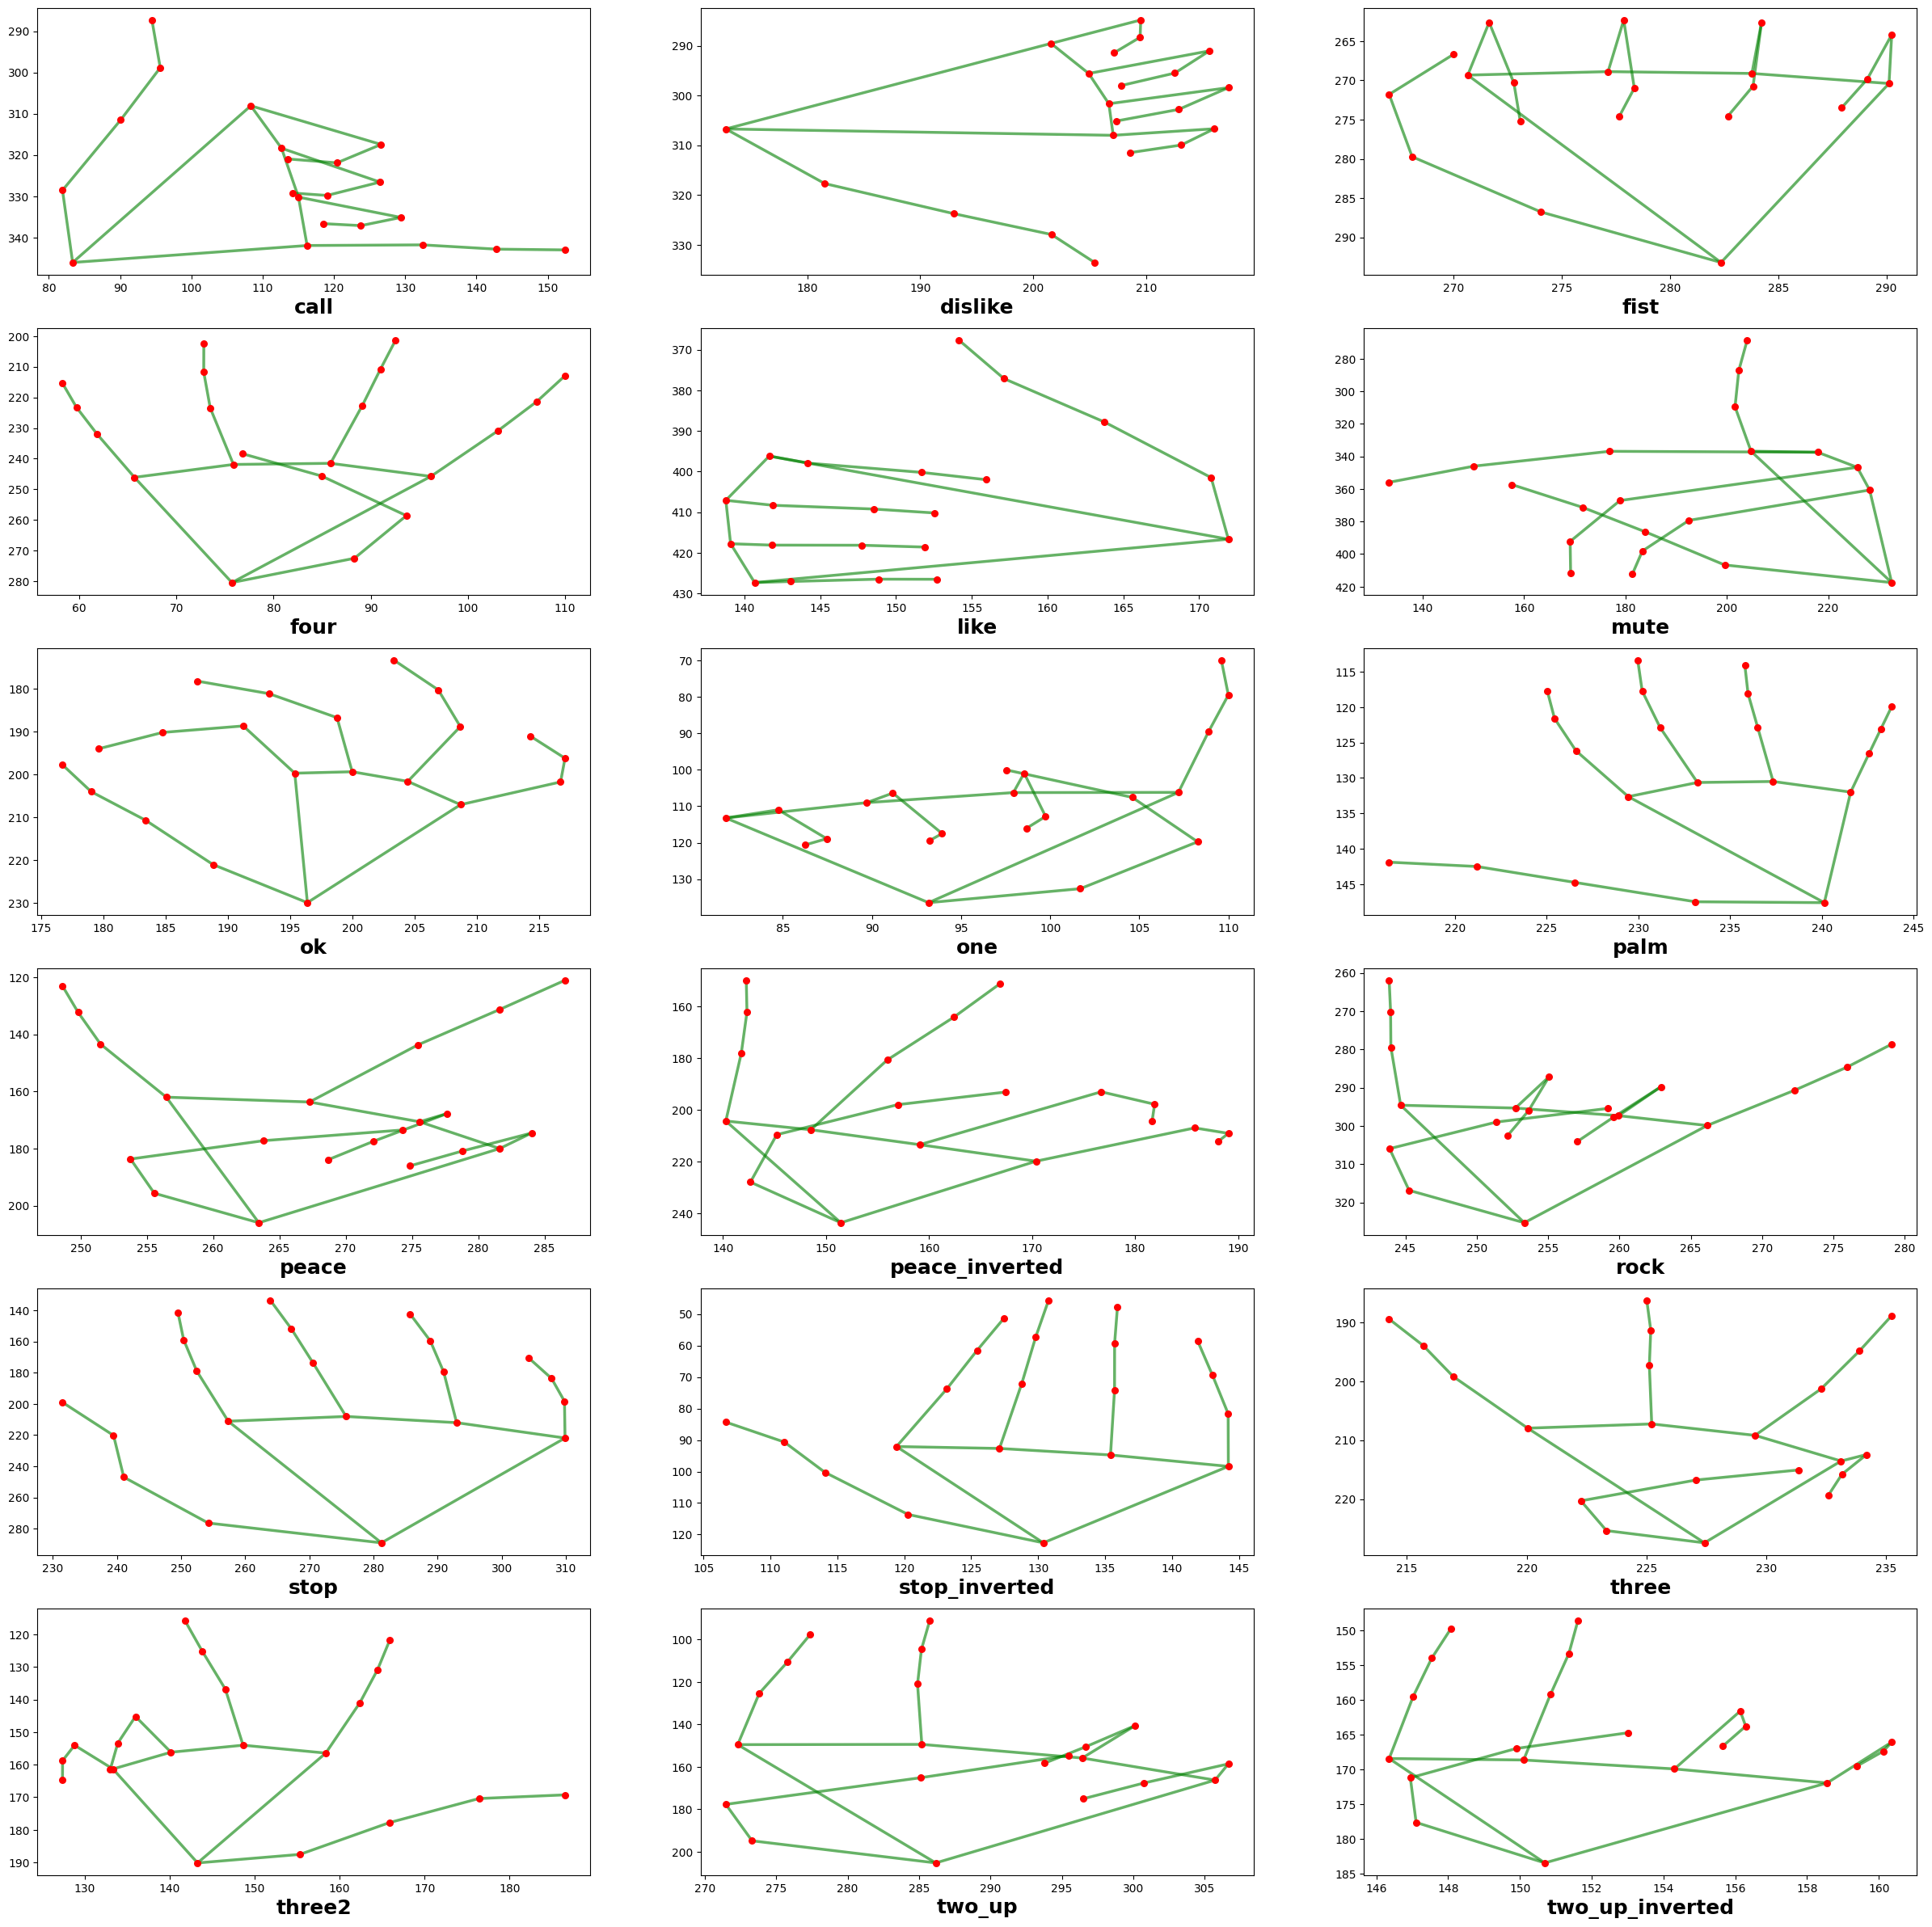

In [202]:
sample_df = df.iloc[[1,1613,2960,4150,6043,6891, 8100, 9600,10760,12600,14000,15500,16880,19000,19860,21310,23000,24306]]
#        'call', 'dislike', 'fist', 'four', 'like', 'mute', 'ok', 'one',
#        'palm', 'peace', 'peace_inverted', 'rock', 'stop', 'stop_inverted',
#        'three', 'three2', 'two_up', 'two_up_inverted'
def plot_samples(n_rows,n_cols,sample_df):
        fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(10*n_cols,n_rows*5),squeeze=False)
        axes = axes.flatten()
        for i in range (len(sample_df)):
                ax = axes[i]
                ax.invert_yaxis()
                xs = [sample_df.iloc[i][f'x{k}'] for k in range(1, 22)]
                ys = [sample_df.iloc[i][f'y{k}'] for k in range(1, 22)]
                for pt1, pt2 in connections:
                        ax.plot([xs[pt1], xs[pt2]], [ys[pt1], ys[pt2]], 'g-', linewidth=2.5, alpha=0.6)
                ax.scatter(xs, ys, c='red', s=30, zorder=2)
                ax.set_xlabel(sample_df.iloc[i]['label'], fontsize=18, fontweight='bold')
plot_samples(6,3,sample_df)


we notice from the previous visualization that the points are not centered around a fixed point and are not scaled

that can cause some problems so we will fix that later in preprocessing step

# 2 - Data Preprocessing

## Handling Nulls

In [109]:
df.isnull().sum()

x1       0
y1       0
z1       0
x2       0
y2       0
        ..
z20      0
x21      0
y21      0
z21      0
label    0
Length: 64, dtype: int64

no missing values in our dataset

## Recentering Landmarks to wrist point

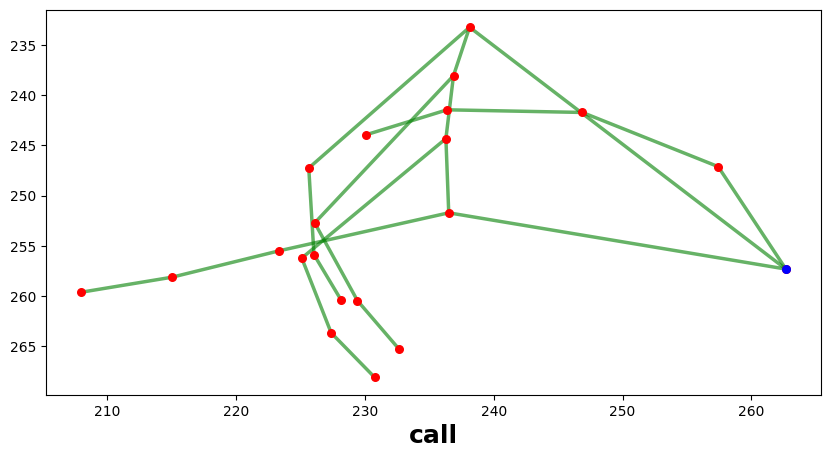

In [203]:
plot_samples(1,1,df.iloc[[0]])
plt.scatter(df.iloc[0]['x1'],df.iloc[0]['y1'],c='blue',s=30,zorder=3)
plt.show()

this is just a check that (x1,y1) are the wrist point that we want to recenter to , so i colored it in blue

In [210]:
df_recentered = df.copy()
for i in range(1,22):
    df_recentered[f'x{i}'] -=  df['x1'] 
    df_recentered[f'y{i}'] -=  df['y1'] 


In [205]:
df_recentered.head()

,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,...,x19,y19,z19,x20,y20,z20,x21,y21,z21,label
0,0.0,0.0,-3.649205e-07,-5.252426,-10.195847,0.004224,-15.787010,-15.588074,0.005798,-26.285431,...,-39.324875,-1.814209,-0.020450,-47.626602,0.809845,-0.024577,-54.663574,2.303772,-0.026722,call
1,0.0,0.0,-2.345265e-07,-1.426741,-17.496765,-0.011102,6.728354,-34.523865,-0.021096,12.290045,...,49.099840,-4.264679,-0.038175,59.421804,-3.229858,-0.037336,69.079920,-3.043121,-0.036136,call
2,0.0,0.0,-2.417307e-07,7.703602,-18.729457,-0.000184,19.502552,-36.561153,-0.009687,27.656651,...,62.544033,8.367446,-0.044068,74.668156,11.041146,-0.040469,85.232975,12.036739,-0.038301,call
3,0.0,0.0,-1.233261e-07,-0.473202,-11.044281,-0.002824,1.659931,-21.513245,-0.008911,2.708370,...,30.218754,-2.236694,-0.027622,36.076504,-1.881897,-0.027863,41.013668,-2.045410,-0.027723,call
4,0.0,0.0,-1.622995e-07,-0.274384,-13.780403,-0.002884,3.187592,-30.717304,-0.008115,3.757233,...,37.901108,-9.464619,-0.025113,46.036453,-11.043720,-0.024087,52.792480,-13.250679,-0.023486,call


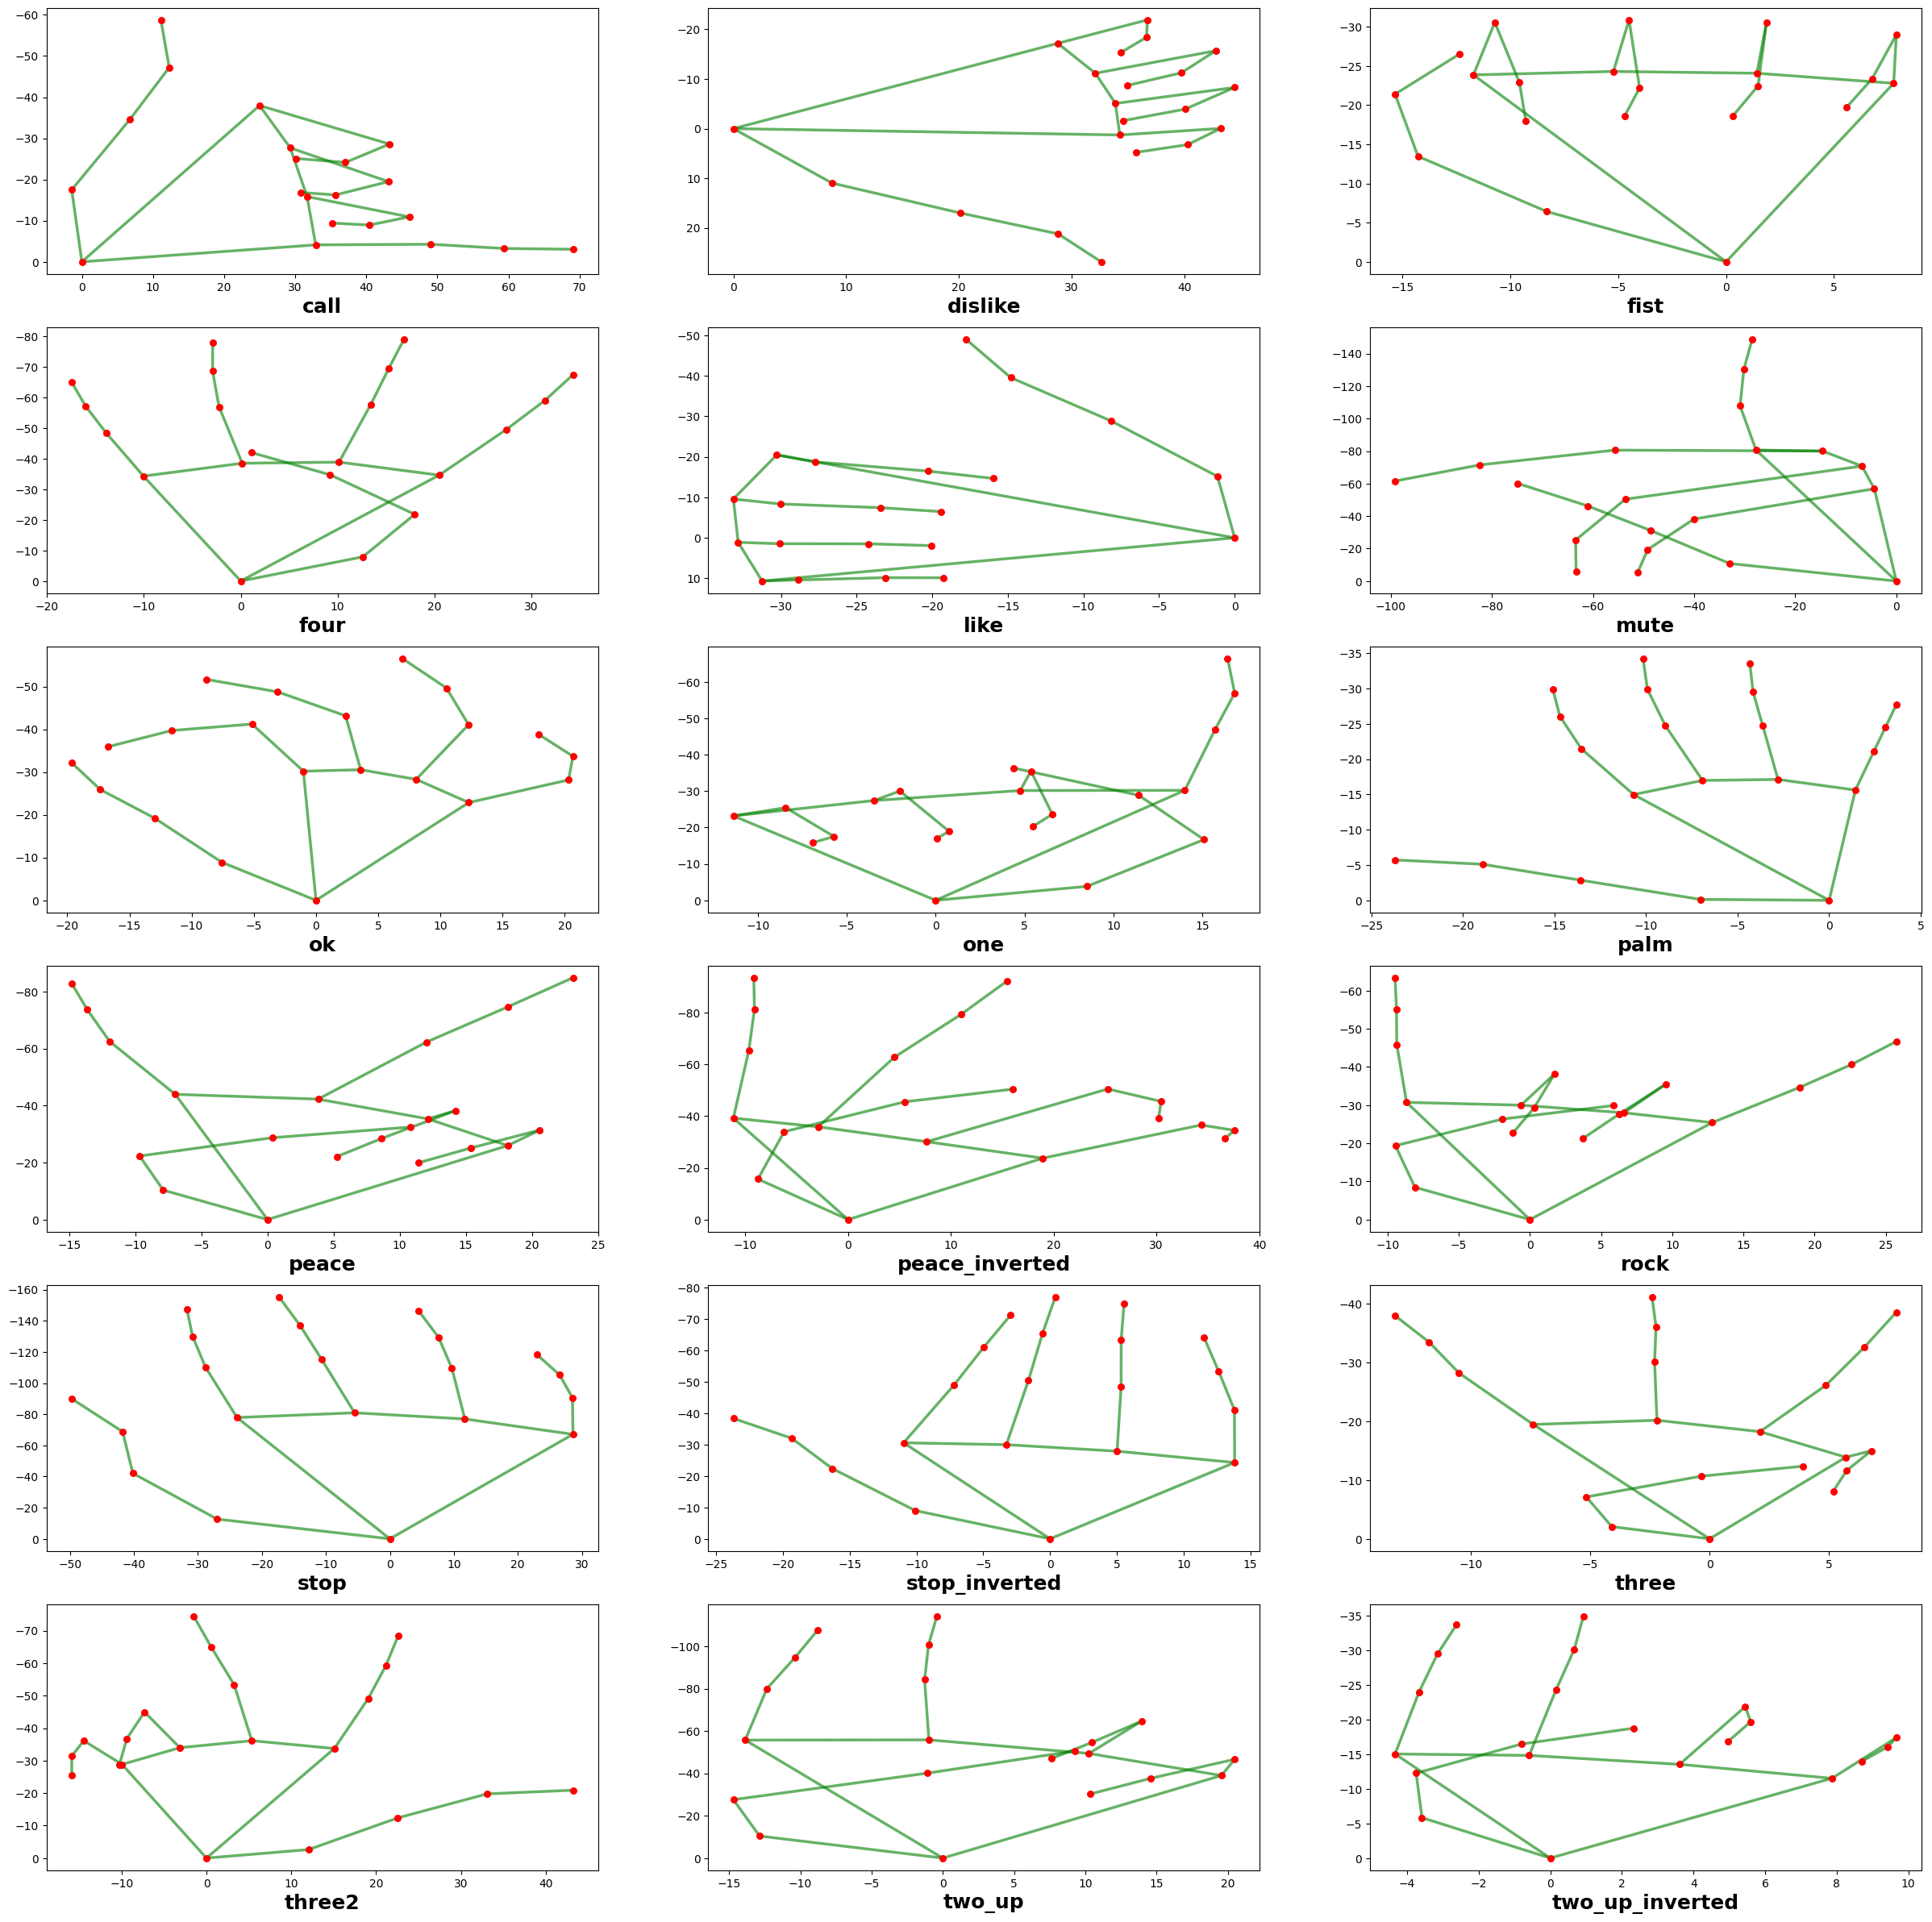

In [218]:
sample_df = df_recentered.iloc[[1,1613,2960,4150,6043,6891, 8100, 9600,10760,12600,14000,15500,16880,19000,19860,21310,23000,24306]]
plot_samples(6,3,sample_df)

## Normalizing Data to the tip of the middle finger

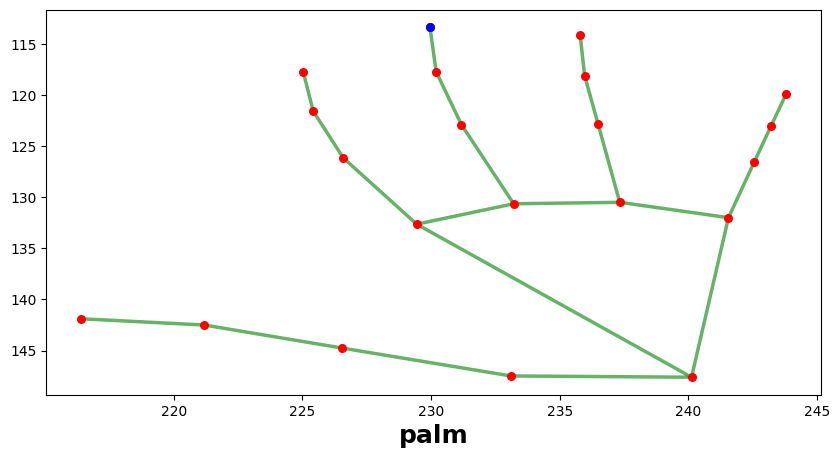

In [207]:
plot_samples(1,1,df.iloc[[10760]])
plt.scatter(df.iloc[10760]['x13'],df.iloc[10760]['y13'],c='blue',s=30,zorder=3)
plt.show()

this is just another check that the tip of the middle finger is at index 13

In [211]:
df_normalized = df_recentered.copy()
for i in range(1,22):
    df_normalized[f'x{i}'] /=  (df_recentered['x13']+1e-6)
    df_normalized[f'y{i}'] /=  (df_recentered['y13']+1e-6)

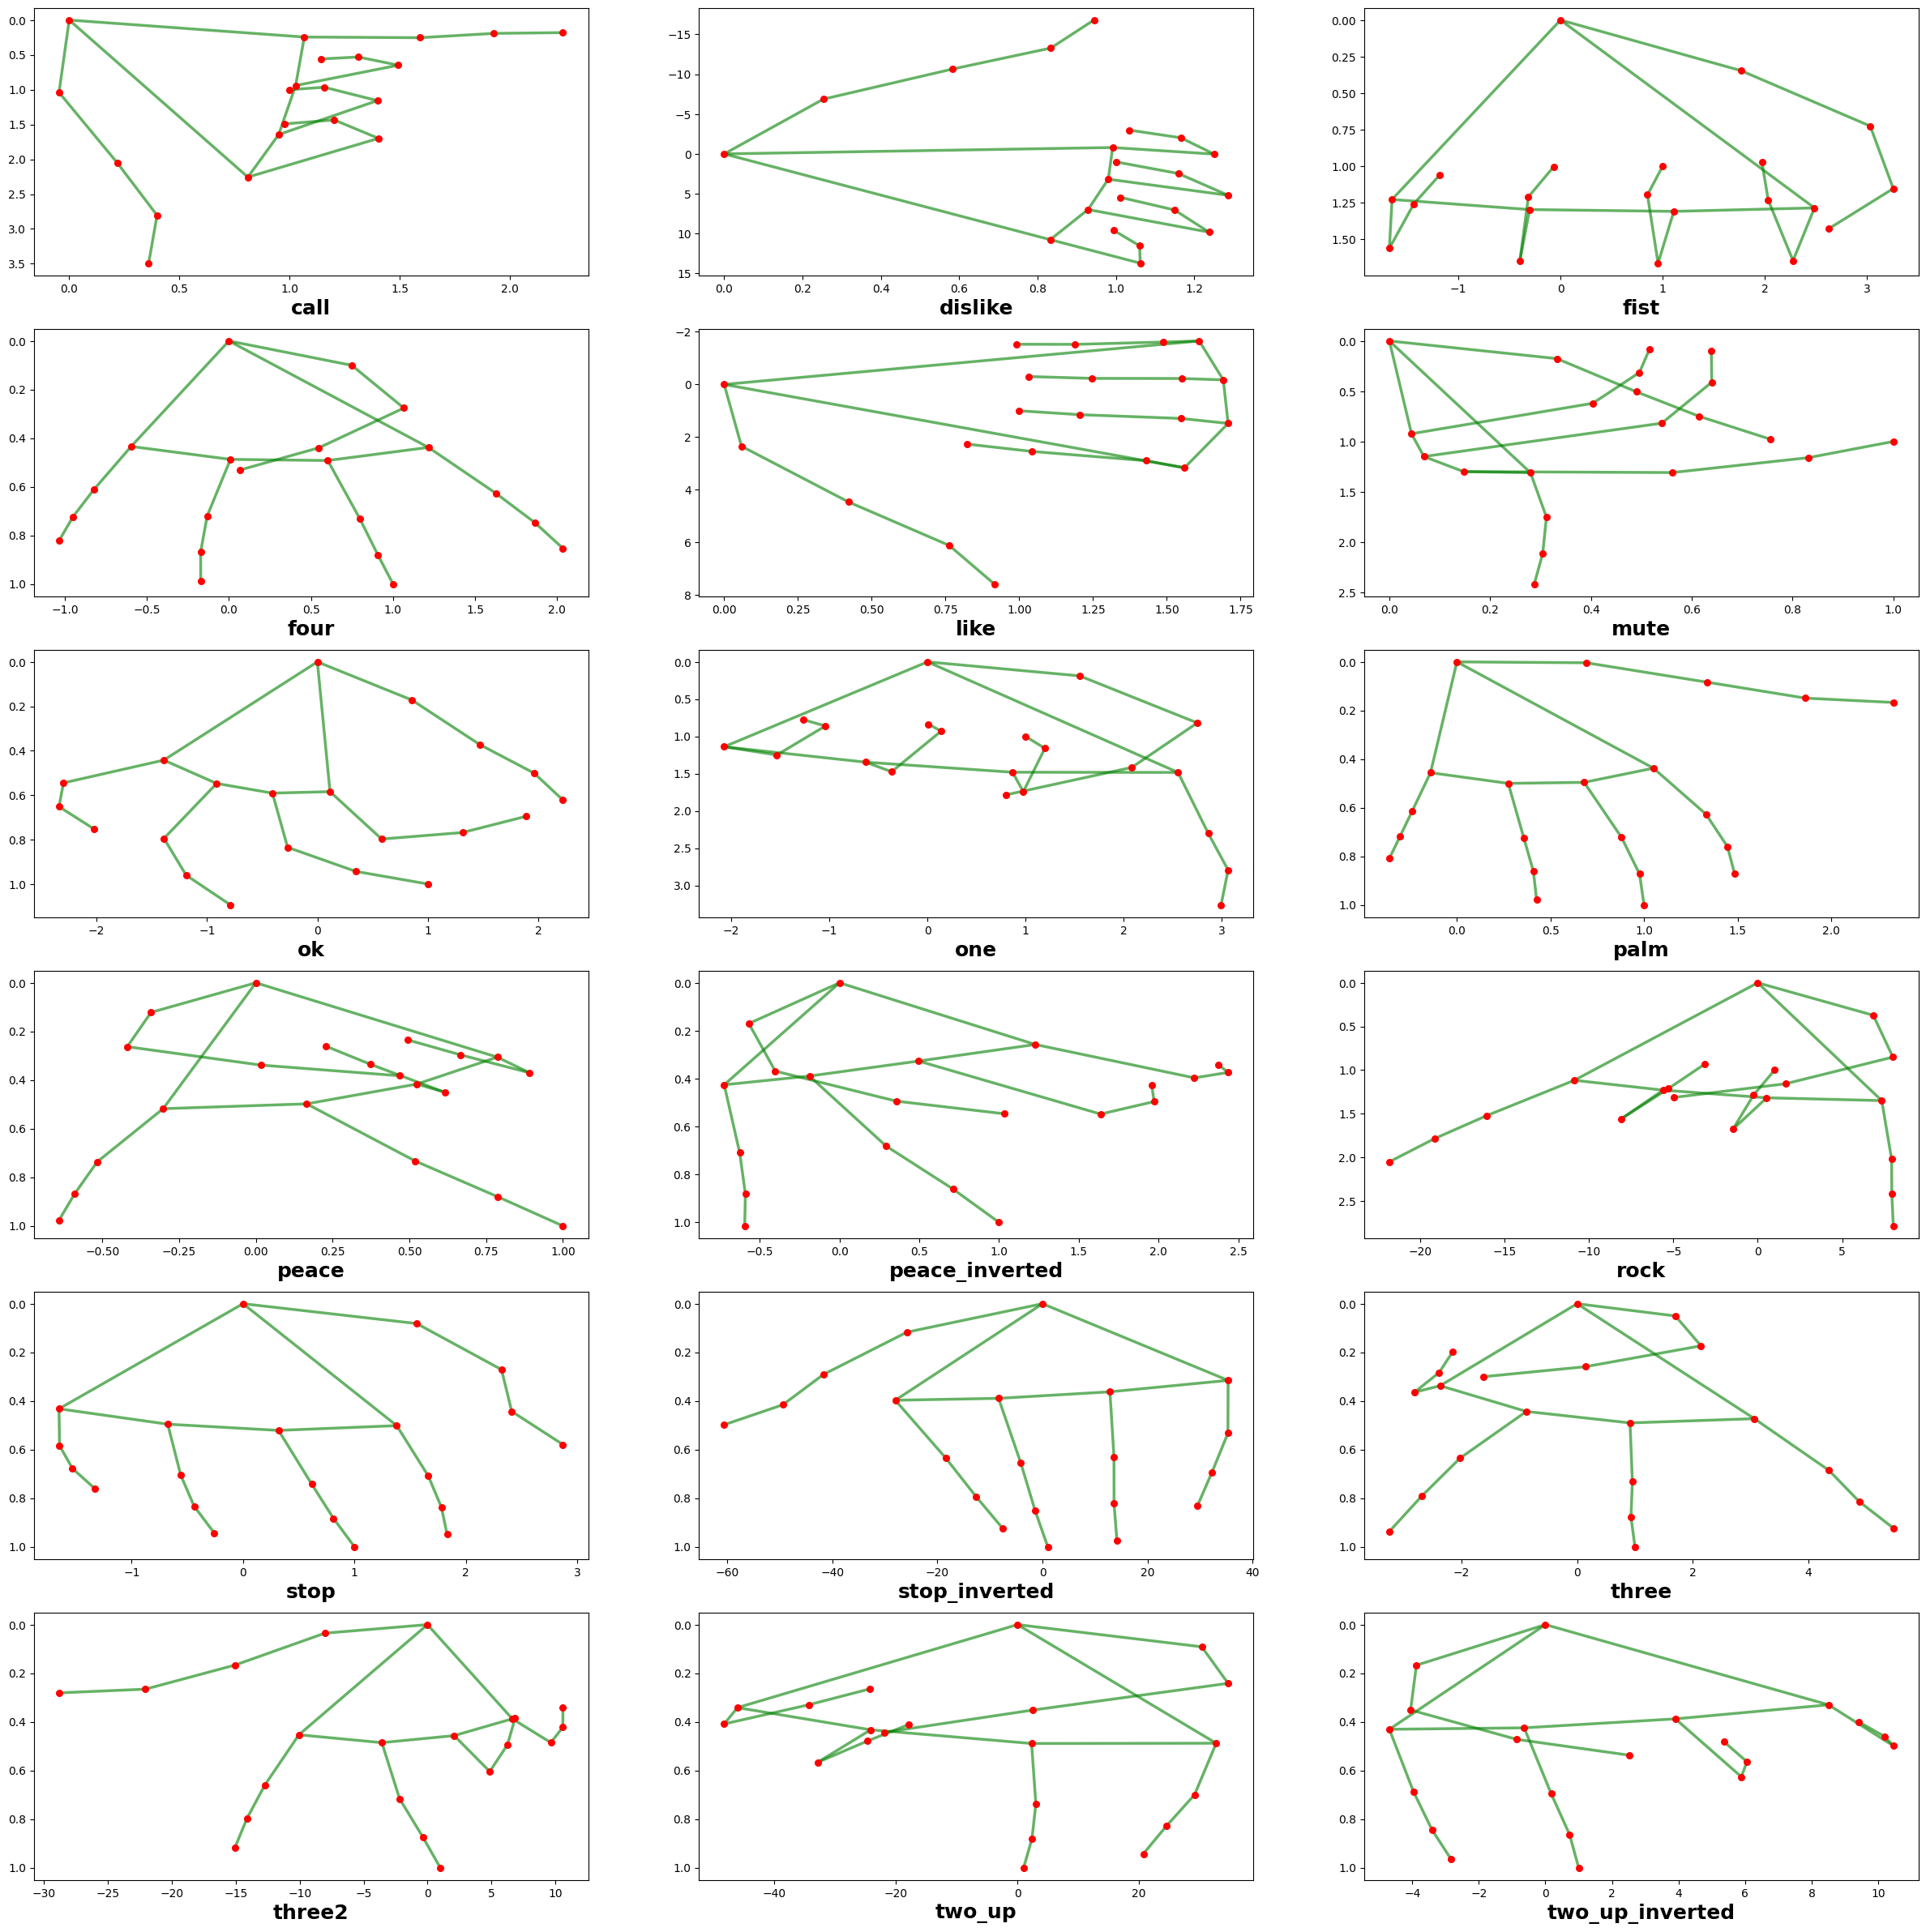

In [219]:
sample_df = df_normalized.iloc[[1,1613,2960,4150,6043,6891, 8100, 9600,10760,12600,14000,15500,16880,19000,19860,21310,23000,24306]]
plot_samples(6,3,sample_df)

we can see tip of middle finger (x13,y13) are now 1 after normalization and other points are scaled correctly to 

so all gestures have similar scale

Note : they are flipped now because the values of y that i divided by are mostly negative number

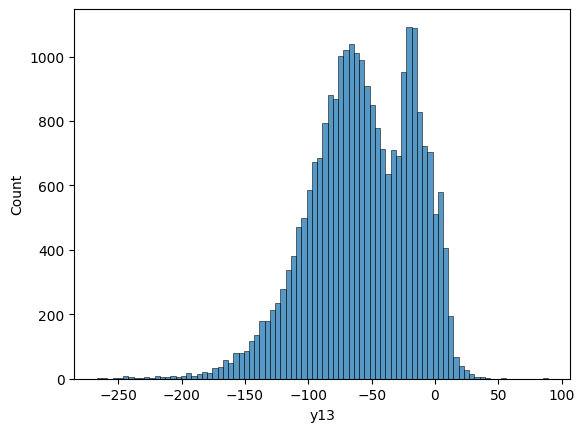

In [226]:
sns.histplot(df_recentered['y13'])
plt.show()

## Splitting data to train/test

In [ ]:
X = df_normalized.drop('label', axis=1)
y = df_normalized['label']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=42,shuffle=True)
# I used stratify here to handle data imbalance to be sure that all classes are represented in out training and test